In [156]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
np.random.seed(0)

In [157]:
#One-factor CFM MC simulation
def One_factor_CFM(tau, Tenor, fwd_vol, N_sim):
    #Setup time index and tau
    M = int(Tenor/tau) #Number of steps
    ZCBprut = []
    for i in range (M+1):
        ZCBprut.append(np.exp(-0.03+i))
    #Start forward rate (Calc first stem from f(0,T_i))
    #FR_0 = np.array(ZCBprut[1:])
    FR_0 =  0.03 #constant
    print("FR_0=", FR_0)
    # Create a 3D array to store all simulation paths
    FR_mc = np.zeros((M, M, N_sim))
    for n in range(N_sim):
        if n % 1000 == 0:
            print("n=", n)
        
        FR=np.zeros((M,M)) #M=N=k+1
        FR[:,0] = FR_0
        for t in range(M):#k=0,1,2,...,M-1 thus M-1 forward rates
            dW=np.random.standard_normal()
            for k in range(t+1,M):#t<=T_k
                
                drift = fwd_vol[k]* sum( tau  * fwd_vol[j]*1  for j in range(k+1, M))
                FR[k][t+1]=FR[k][t] - (drift+0.5*fwd_vol[k]**2)*tau + fwd_vol[k]*np.sqrt(tau)*dW

        FR_mc[:, :, n] = FR #consider makeing it 3 dimensional to save the individual paths and not only the mean

    return FR_mc
timetoend = 24#11#
lenCFM = timetoend-1
tau = 1
#ZCB_RFR = np.ones(lenlibor) #np.array(P_0_T[:lenlibor])#np.array(ZCB_leg[1:12])
#print("ZCB's=", ZCB_RFR)
#FR_vol= np.array(asdfghjklm[:lenlibor-1]) 
FR_vol = np.zeros(timetoend) + 0.1 #constant volatility

CFM3D = One_factor_CFM(1, int(lenCFM), FR_vol, 10000)#???husk ændre til 10000
print("CFM model results", CFM3D.shape)

np.set_printoptions(suppress=True)

CFM_mean = np.mean(CFM3D, axis=2)
print("CFM model mean results", CFM_mean)

FR_0= 0.03
n= 0
n= 1000
n= 2000
n= 3000
n= 4000
n= 5000
n= 6000
n= 7000
n= 8000
n= 9000
CFM model results (23, 23, 10000)
CFM model mean results [[ 0.03        0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.03       -0.18445265  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.03       -0.17445265 -0.37934464  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.03       -0.16445265 -0.35934464 -0.55525767  0.          0.
   0. 

In [158]:
'''
def test(M,k):
    return (0.2**2)*(M-(k+1)-0.5)#-np.mean(np.random.standard_normal(size = 200000)*0.2)
print(0.03 + test(24, 1))
print(0.03 + test(24, 2), 0.03 + test(24, 2)+ test(24, 2))
print(0.03 + test(24, 3), 0.03+ test(24, 3)+ test(24, 3), 0.97044553 + test(24, 3)+ test(24, 3)+test(24,3))
print(0.03 + test(24, 4), 0.03+ test(24, 4)+ test(24, 4),0.97044553 + test(24, 4)+ test(24, 4)+test(24,4),
       0.03+ test(24, 4)+ test(24, 4)+test(24,4)+ test(24, 4))'''
print(CFM_mean)

[[ 0.03        0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.03       -0.18445265  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.03       -0.17445265 -0.37934464  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.03       -0.16445265 -0.35934464 -0.55525767  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.  

In [159]:
print(np.exp(-CFM_mean))

[[0.97044553 1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.        ]
 [0.97044553 1.20256004 1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.        ]
 [0.97044553 1.19059437 1.46132659 1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.        ]
 [0.97044553 1.17874775 1.43239038 1.74238989 1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.        ]
 [0.97044553 1.16701902 1.40402715 1.69089449 2.

[[0.97044553 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.97044553 1.20869432 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.97044553 1.19666761 1.47632172 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.97044553 1.18476057 1.44708859 1.76920309 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.97044553 1.172972   1.41843432 1.71691523 2.

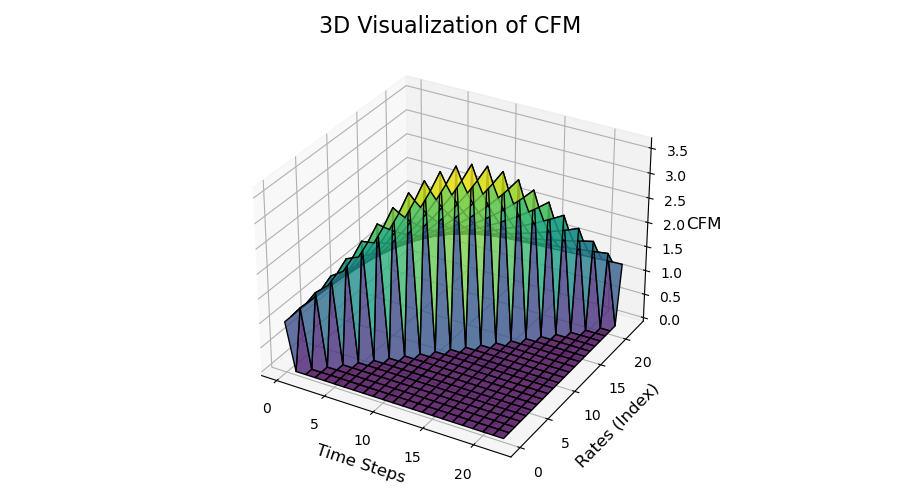

In [165]:
leg = np.mean(np.exp(-CFM3D), axis = 2)
leg[leg == 1] = 0
print(leg)

#Plot one factor CFM market model
num_steps = CFM_mean.shape[0]
num_rates = CFM_mean.shape[1]
#print(CFM_mean)

# Create a 3D surface plot
time_steps = np.arange(num_steps)
rates = np.arange(num_rates)
X, Y = np.meshgrid(time_steps, rates)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

# Plot the forward rates as a surface
ax.plot_surface(X, Y, leg, cmap="viridis", edgecolor="k", alpha=0.8)

# Axis labels
ax.set_title("3D Visualization of CFM", fontsize=16)
ax.set_xlabel("Time Steps", fontsize=12)
ax.set_ylabel("Rates (Index)", fontsize=12)
ax.set_zlabel("CFM", fontsize=12)

plt.tight_layout()
plt.show()

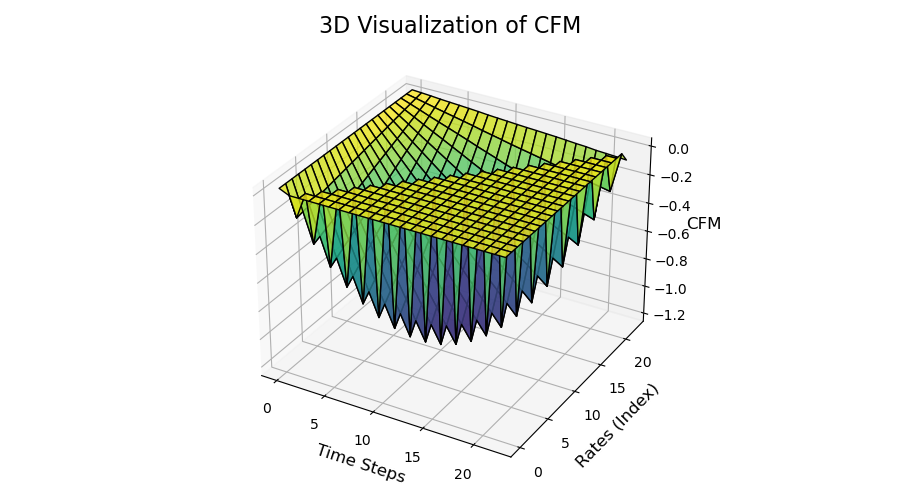

In [161]:
#Plot one factor CFM market model
num_steps = CFM_mean.shape[0]
num_rates = CFM_mean.shape[1]
#print(CFM_mean)

# Create a 3D surface plot
time_steps = np.arange(num_steps)
rates = np.arange(num_rates)
X, Y = np.meshgrid(time_steps, rates)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

# Plot the forward rates as a surface
ax.plot_surface(X, Y, CFM_mean, cmap="viridis", edgecolor="k", alpha=0.8)

# Axis labels
ax.set_title("3D Visualization of CFM", fontsize=16)
ax.set_xlabel("Time Steps", fontsize=12)
ax.set_ylabel("Rates (Index)", fontsize=12)
ax.set_zlabel("CFM", fontsize=12)

plt.tight_layout()
plt.show()

In [162]:
#Numaraire under the forward measure
def ZCB_CFM(CFM, tau, t):
    num_steps = CFM.shape[0]
    N_sim = CFM.shape[2]
    ZCB_mc = np.ones((num_steps, N_sim))
    for i in range(1, num_steps):
        ZCB_mc[i,:] = ZCB_mc[i-1,:] * np.exp(-CFM[i, t,:])
    return ZCB_mc

ZCB_mc = ZCB_CFM(CFM3D, 1, 0) #D(0,T)
print("ZCB_mc", ZCB_mc.shape)
ZCB_mean = np.mean(ZCB_mc, axis=1) #P(0,T)
print(ZCB_mean)

def ZCB_test(CFM, tau, t): # can only calculate for P(0,T)
    num_rates, _, N_sim = CFM.shape
    ZCB_mc = np.ones((num_rates, N_sim))

    for i in range(1, num_rates):
        ZCB_mc[i, :] = ZCB_mc[i - 1, :] * np.exp(-CFM[i-1, t,:])
    
    return ZCB_mc

#Checks martingality
print("P(0,T_k-1,T_K)=", -1/1*np.log(np.mean(ZCB_mc[1:,:]/ZCB_mc[:-1,:], axis=1)))


ZCB_mc (23, 10000)
[1.         0.97044553 0.94176453 0.91393119 0.88692044 0.86070798
 0.83527021 0.81058425 0.78662786 0.76337949 0.74081822 0.71892373
 0.69767633 0.67705687 0.65704682 0.63762815 0.61878339 0.60049558
 0.58274825 0.56552544 0.54881164 0.5325918  0.51685133]
P(0,T_k-1,T_K)= [0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]


Simulated caplet price = [0.018517279765993024, 0.007812153673374293, 0.004703290829885675, 0.0030680453029625705, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006000442053800999, 0.0, 0.005099970934316606, 0.00014114885079215554, 0.003492855723839454, 0.019664779497673496, 0.026530132140812145, 0.043576151882151436, 0.04186032334018491, 0.047952793864891166, 0.059721766197845604, 0.07739965388381188, 0.0982877269600582]
cap sim price = 0.46382851490239363
BS caplet price = [0.0004411004450366318, 0.005690594981246856, 0.013220206001915405, 0.022070401116783718, 0.0318259943044979, 0.0422089710223475, 0.05301504386329384, 0.06408566025610661, 0.07529326298021527, 0.0865326168722818, 0.0977152982935853, 0.10876599399119488, 0.1196199100992397, 0.130220900448332, 0.14052008164761018, 0.1504747893023813, 0.16004778012154858, 0.1692066152533046, 0.17792317948148562, 0.18617330349891345, 0.1939364649261545, 0.2011955495737637]
BS cap price = 2.230183718481239
Difference cap= [-0.01807618 -0.00212156  0.00851

C:\Users\User\AppData\Local\Temp/ipykernel_5652/3042999944.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(L/K)+ 0.5*sigma**2*T)/(sigma*np.sqrt(T))


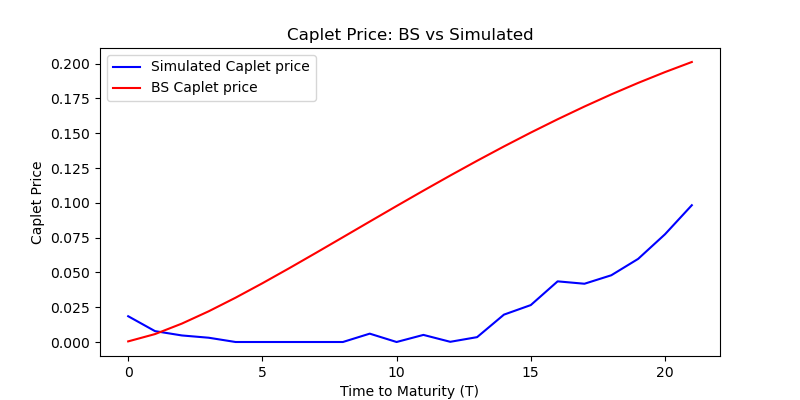

In [163]:
def sim_caplet(CFM, K, t_0, k, ZCB):#is used in ZCB_mc if t_0 \neq 0
    tau = 1
    # Payoff based on ZCB at T_{k-1} for maturity T_k
    SPi =  1/np.exp(-CFM3D[k,k, :])
    KPi = (1 + K*tau)
    payoff = np.maximum(SPi - KPi, 0)
    caplet_price = np.mean(ZCB[-1,:])/tau*np.mean(payoff/ZCB_test(CFM, tau, k)[-1])
    #print(np.mean(payoff), 1/np.mean(ZCB_CFM(CFM3D, 1, k)[-1,:]), np.mean(payoff))
    return caplet_price

sim_caplet_res = []
for i in range(1,lenCFM):
    sim_caplet_res.append(sim_caplet(CFM3D, 0.03, 0, i, ZCB_mc)) 
print("Simulated caplet price =", sim_caplet_res)
print("cap sim price =", sum(sim_caplet_res))

def Black76(L,K,T,sigma): #BS pricing fomula
    d1 = (np.log(L/K)+ 0.5*sigma**2*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return L*norm.cdf(d1)- K*norm.cdf(d2)

def caplet(L,K,T,sigma, ZCB): #BS price of a caplet
    tau = 1
    SPi = 1/L #ZCB[T-1]/ZCB[T]
    KPi =(1 + K*tau)
    VPI = tau**2 * sigma**2 * (T-tau)
    
    return (ZCB[T] / tau) * Black76(SPi, KPi, T, VPI)  

BS_caplet = [] #np.zeros((lenCFM-1, len(CFM3D[0,0,:])))
for i in range(1,lenCFM):
    BS_caplet.append(caplet(np.exp(-CFM3D[i,0, 0]), 0.03, i, FR_vol[i], ZCB_mean)) # t=0
print("BS caplet price =", BS_caplet)
print("BS cap price =", sum(BS_caplet))


#print("Difference=", np.array(BS_caplet) - np.array(sim_caplet))
print("Difference cap=", np.array(BS_caplet)-np.array(sim_caplet_res)) 

plt.figure(figsize=(8, 4))
plt.plot(sim_caplet_res, label='Simulated Caplet price', color="blue")
plt.plot(BS_caplet, label='BS Caplet price', color="red")
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Caplet Price')
plt.title('Caplet Price: BS vs Simulated')
plt.legend()
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_5652/3042999944.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(L/K)+ 0.5*sigma**2*T)/(sigma*np.sqrt(T))


Implied volatility= [0.         0.11780169 0.05875882 0.03617369 0.         0.
 0.         0.         0.         0.02593933 0.         0.02126262
 0.         0.01594934 0.03706745 0.04159534 0.05168623 0.04917938
 0.05125492 0.05584433 0.06222688 0.06880668]
Difference in IV and FR vol= [ 0.1        -0.01780169  0.04124118  0.06382631  0.1         0.1
  0.1         0.1         0.1         0.07406067  0.1         0.07873738
  0.1         0.08405066  0.06293255  0.05840466  0.04831377  0.05082062
  0.04874508  0.04415567  0.03777312  0.03119332]


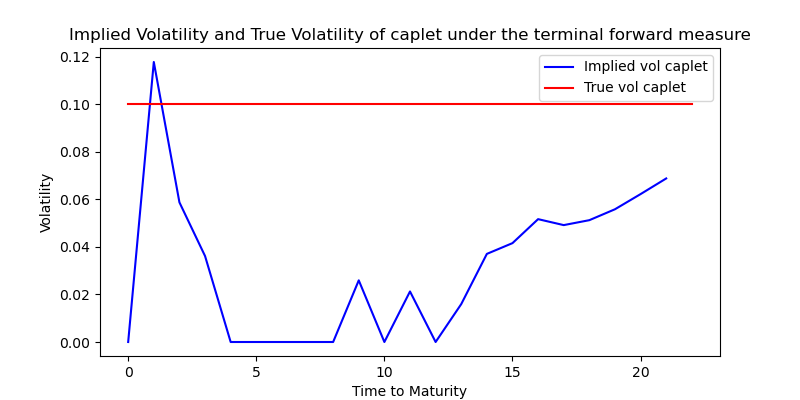

In [164]:
def imp_vol_bach_to_BS_updated(L, K, T, dis, market_price):
    try:
        sigma_black = brentq(lambda sigma: caplet(L,K,T,sigma, dis) - market_price, 1e-3, 10.0)
        return sigma_black
    except ValueError:
        return 0  # Return 0 if no root is found
implied_vol = np.zeros(len(sim_caplet_res))
for k in range(1, len(sim_caplet_res)+1):
    market_price = sim_caplet_res[k-1]
    implied_vol[k-1] = imp_vol_bach_to_BS_updated(np.exp(-CFM_mean[k,0]), 0.03, k, ZCB_mean, market_price)#ZCB_cap_0[i+1] for -drift?
    
#print(len(sim_caplet), Libor_mean.shape, len(implied_vol))
print("Implied volatility=", implied_vol)

print("Difference in IV and FR vol=", FR_vol[1:-1]-implied_vol)

#Plot of the volatility
plt.figure(figsize=(8, 4))
plt.plot(implied_vol, label='Implied vol caplet', color="blue")
plt.plot(FR_vol[:-1], label='True vol caplet', color="red")
plt.xlabel('Time to Maturity')
plt.ylabel('Volatility')
plt.title('Implied Volatility and True Volatility of caplet under the terminal forward measure')
plt.legend()
  